In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import numpy as np
from utils import *
from matplotlib import pyplot as plt
from roboflow import Roboflow
from segment_anything import SamPredictor, sam_model_registry
from helper_code.pipeline import run_pipeline
import os
import random

**ChartQA Questions and Answers**

In [2]:
filename = "../ChartQA-main/ChartQA Dataset/test/test_human.json"
images = ["4526.png", "4554.png", "21908513006395.png", "83600580007593.png"]

with open(filename) as r:
    questions = json.load(r)

subset_questions = []

for question in questions:
    if question["imgname"] in images:
        subset_questions.append(question)

In [3]:
subset_questions

[{'imgname': '4554.png',
  'query': "What political party has the highest rate of 'confirmed respondents'?",
  'label': 'Democrat (scores 60 to 100)'},
 {'imgname': '4554.png',
  'query': 'What percentage of pollers did NOT have phone number?',
  'label': '0.01'},
 {'imgname': '4526.png',
  'query': 'Find missing value- 2.9, 2.9, 3.5, 4.5, 5.6, 6.6, 6.8?',
  'label': '4.1'},
 {'imgname': '4526.png',
  'query': "What's the median value of red graph?",
  'label': '14.5'},
 {'imgname': '21908513006395.png',
  'query': 'Which year(s) recorded the maximum use of condoms in Germany by men?',
  'label': '[2013, 2016]'},
 {'imgname': '21908513006395.png',
  'query': 'Which three countries are being compared in the given graph?',
  'label': '[Germany, Bolivia, Dominican Republic]'},
 {'imgname': '83600580007593.png',
  'query': 'How many countries are shown in the graph?',
  'label': '3'},
 {'imgname': '83600580007593.png',
  'query': 'Which country has the greatest increase from 1975 to 1980?'

**PlotQA Questions and Answers**

In [2]:
filename = "../PlotQA/annotations.json"

with open(filename) as r:
    annotations = json.load(r)

In [3]:
image_indices = set()
for annotation in annotations:
    if annotation["type"] == "dot_line" or annotation["type"] == "line":
        image_indices.add(annotation["image_index"])

In [32]:
images = random.sample(list(image_indices), 10)

In [6]:
images = [19764, 19933, 299, 17074, 20674, 4759, 18630, 4398, 4676, 19017]

In [4]:
filename = "../PlotQA/qa_pairs_V1.json"

with open(filename) as r:
    questions = json.load(r)

In [7]:
subset_questions = []

for question in questions['qa_pairs']:
    if question["image_index"] in images:
        subset_questions.append({
            'imgname': str(question["image_index"]) + ".png",
            'query': question["question_string"],
            'label': question['answer']
        })

In [8]:
subset_questions

[{'imgname': '299.png',
  'query': 'How many different coloured dotlines are there ?',
  'label': 2},
 {'imgname': '299.png',
  'query': 'Is the number of dotlines equal to the number of legend labels ?',
  'label': 'Yes'},
 {'imgname': '299.png',
  'query': 'What is the cost of damage caused due to the depletion of minerals in Bulgaria in 2008 ?',
  'label': 404531822.628269},
 {'imgname': '299.png',
  'query': 'Across all years, what is the maximum cost of damage caused due to the depletion of minerals in Suriname ?',
  'label': 216047413.4125889},
 {'imgname': '299.png',
  'query': 'Across all years, what is the minimum cost of damage caused due to the depletion of minerals in Bulgaria ?',
  'label': 159471464.949879},
 {'imgname': '299.png',
  'query': 'In which year was the cost of damage caused due to the depletion of minerals in Bulgaria maximum?',
  'label': '2007'},
 {'imgname': '299.png',
  'query': 'In which year was the cost of damage caused due to the depletion of minerals

In [9]:
len(subset_questions)

286

In [ ]:
with open('questions_plot_qa.json', 'w') as file:
    json.dump(subset_questions, file)

**Pipeline**

In [36]:
rf = Roboflow(ROBOFLOW_API_KEY)
project = rf.workspace().project("final_annotation_classification")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [37]:
sam = sam_model_registry["default"](checkpoint="../../../Downloads/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

In [38]:
min_samples = 200

Directory '../results/19764' was created.
{
  "x-axis": {
    "title": "Years",
    "range": [2002, 2007]
  },
  "y-axis": {
    "title": "Aid flow (current US$)",
    "range": [0, 14000000]
  },
  "second-y-axis": {
    "title": null,
    "range": null
  },
  "types": [
    ["Arab World", "black"],
    ["Lower middle income", "blue"],
    ["Sub-Saharan Africa (all income levels)", "green"],
    ["Somalia", "purple"]
  ]
}
{'x-axis': {'title': 'Years', 'range': [2002, 2007]}, 'y-axis': {'title': 'Aid flow (current US$)', 'range': [0, 14000000]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Arab World', 'black'], ['Lower middle income', 'blue'], ['Sub-Saharan Africa (all income levels)', 'green'], ['Somalia', 'purple']]}
{'topLeft': (98, 35), 'bottomRight': (932, 630)}


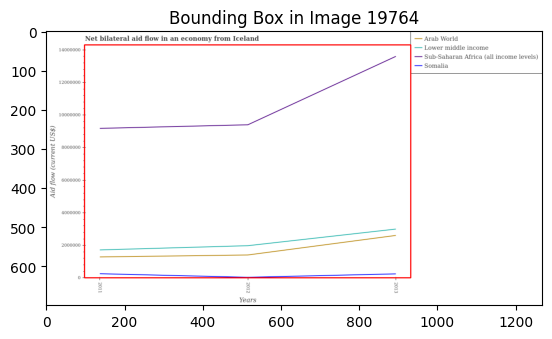

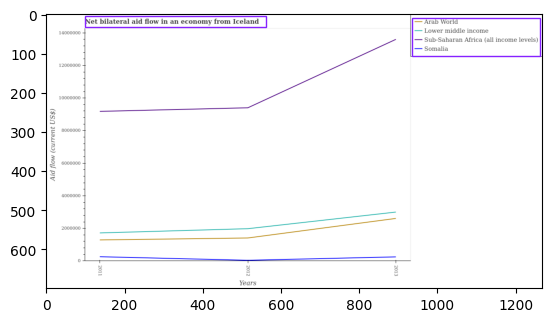

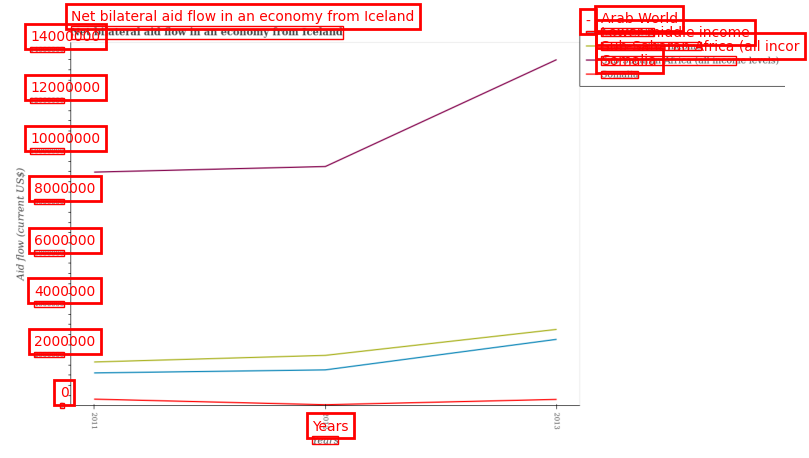

Y MIN 0
Y MAX 14000000
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 14000000.0
Y
OCR DIFF -581.9514094851911
SEM DIFF 14000000.0
OCR RATIO -4.156795782037079e-05
PIXEL DIFF -0.5038901418447495
REAL DIFF FROM BASE POINT 12122.08076283731
Y_MIN -12122.08076283731
Y_MAX 14301787.747841116
x is in fault condition
X
Predicted [2002, 2007]
Chat GPT [2002, 2007]
Y
Predicted [-12122.08076283731, 14301787.747841116]
Chat GPT [0, 14000000]


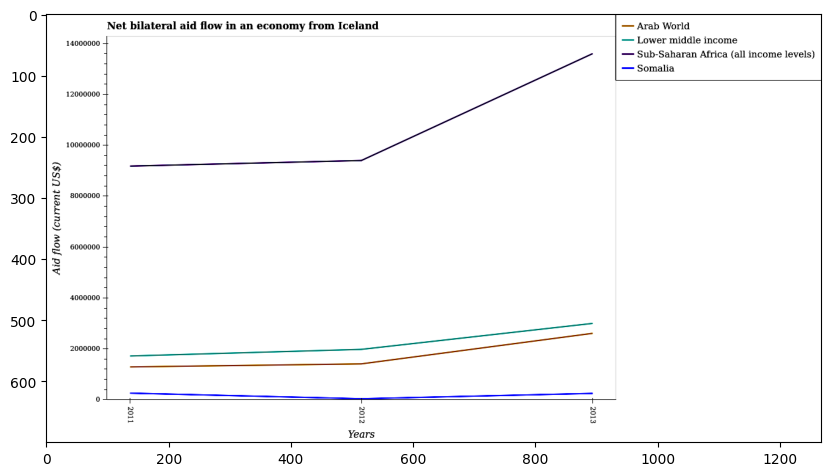

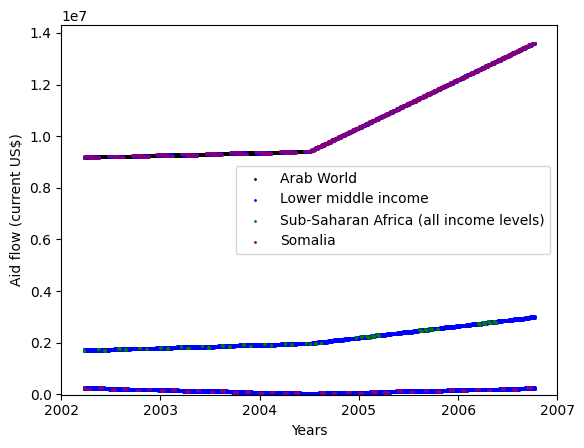

Directory '../results/19933' was created.
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
```json
{
  "x-axis": {
    "title": "Year",
    "range": [2002, 2014]
  },
  "y-axis": {
    "title": "Rating (1=low to 5=high)",
    "range": [0, 3]
  },
  "second-y-axis": {
    "title": null,
    "range": null
  },
  "types": [
    ["Tracking ability", "blue"],
    ["Quality of logistic services", "purple"],
    ["Ease of 

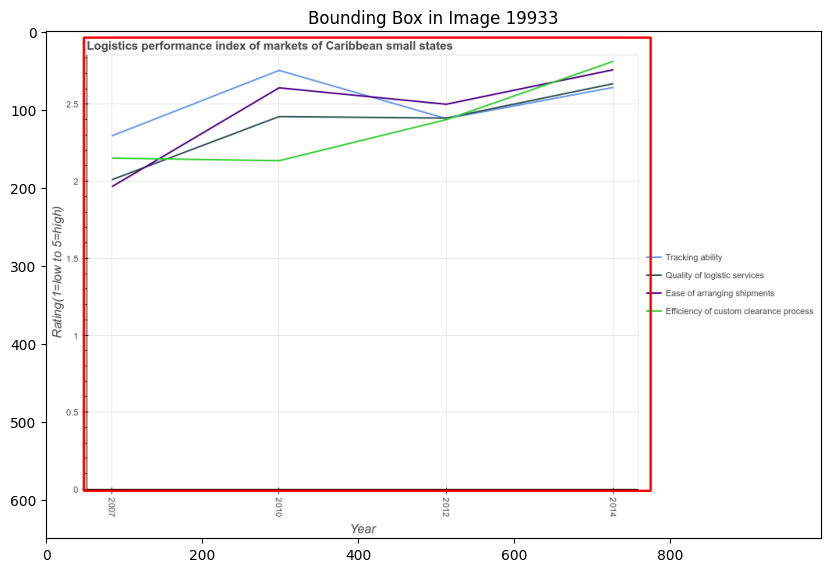

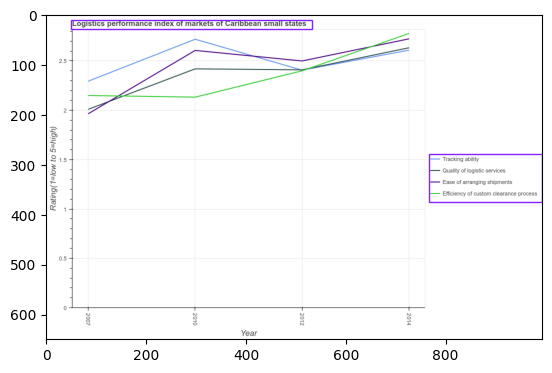

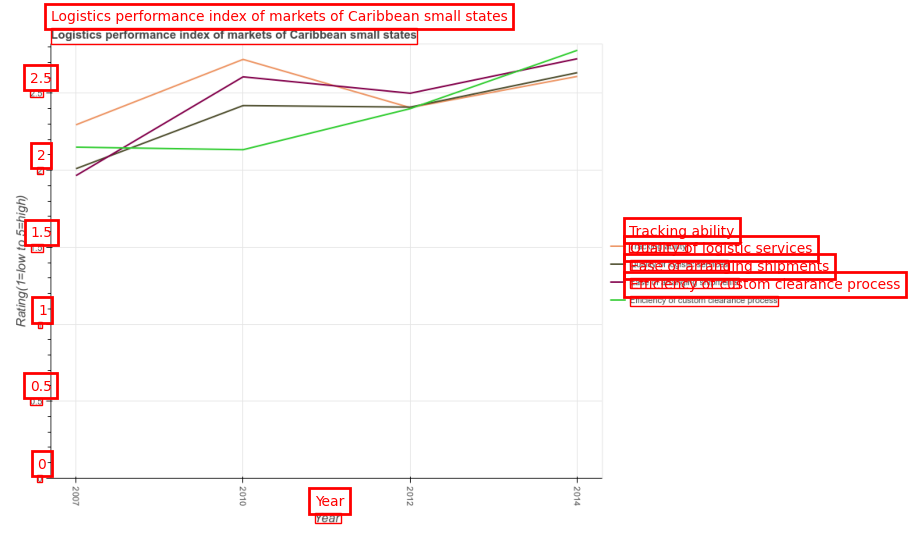

Y MIN 0
Y MAX 2.5
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 2.5
Y
OCR DIFF -494.11808100994676
SEM DIFF 2.5
OCR RATIO -197.6472324039787
PIXEL DIFF -1.2946830932050943
REAL DIFF FROM BASE POINT 0.006550474183007239
Y_MIN -0.006550474183007239
Y_MAX 2.933030277509341
x is in fault condition
X
Predicted [2002, 2014]
Chat GPT [2002, 2014]
Y
Predicted [-0.006550474183007239, 2.933030277509341]
Chat GPT [0, 3]


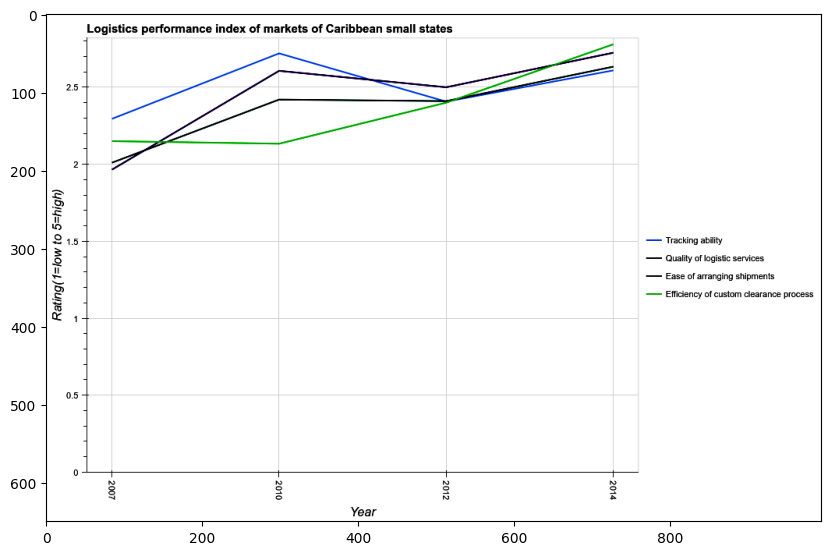

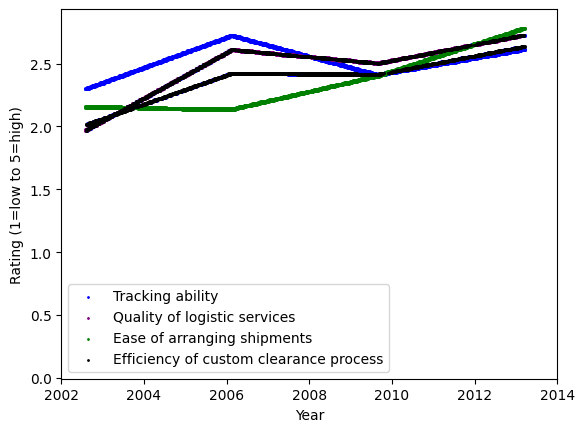

Directory '../results/299' was created.
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[110 110 110]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[110 110 110]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[114 114 114]
  [128 128 128]
  [128 128 128]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
{
  "x-axis": {
    "title": "Years",
    "range": [1995, 2025]
  },
  "y-axis": {
    "title": "Cost (current US$)",
    "range": [0, 400000000]
  },
  "second-y-axis": {
    "title": null,
    "range": null
  },
  "types": [
    ["Bulgaria", "green"],
    ["Suriname", "purple"]
  ]
}
{'x-axis': {'title': 'Years', 'range': [199

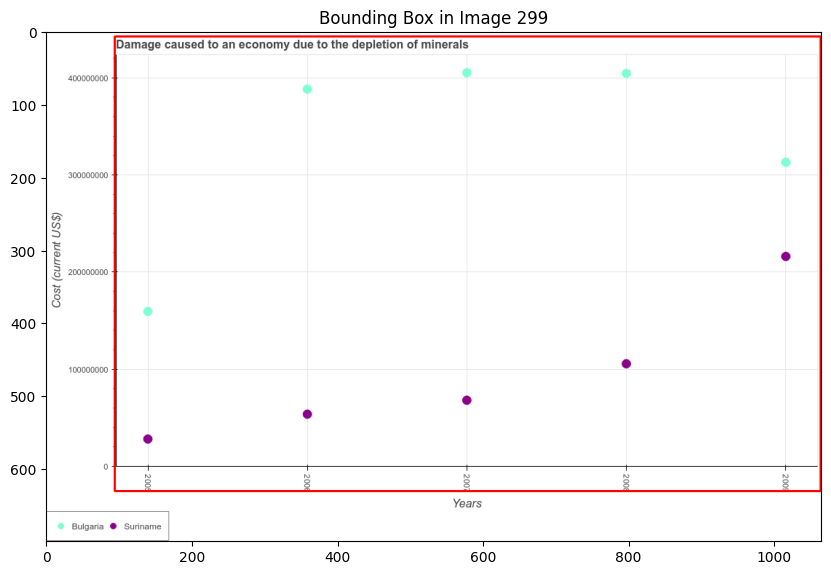

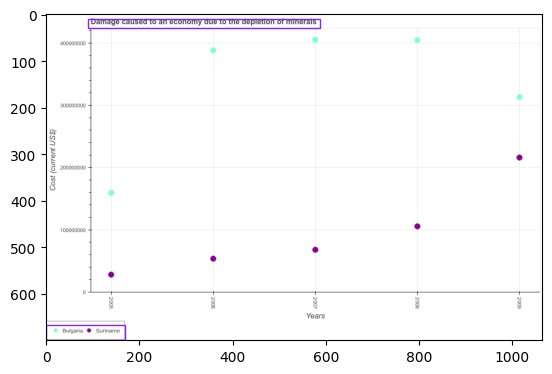

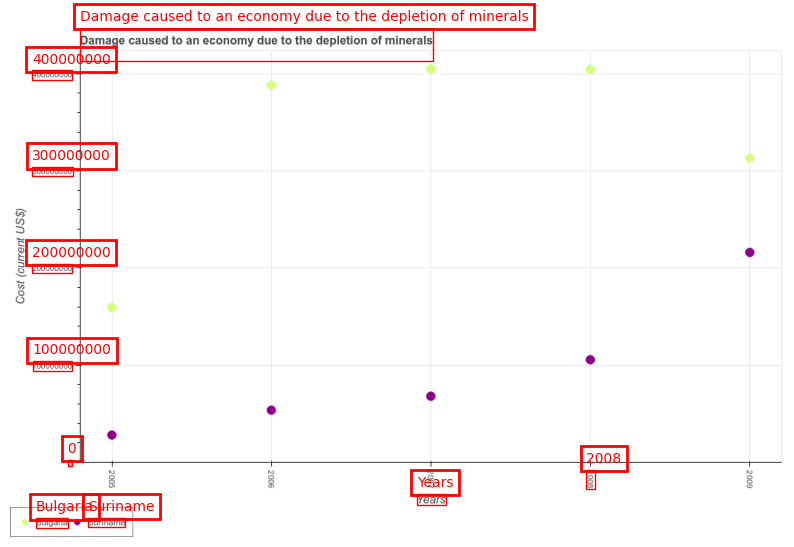

Y MIN 0
Y MAX 400000000
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 400000000.0
Y
OCR DIFF -533.0727199558169
SEM DIFF 400000000.0
OCR RATIO -1.3326817998895423e-06
PIXEL DIFF -33.28904210962355
REAL DIFF FROM BASE POINT 24978987.566561405
Y_MIN -24978987.566561405
Y_MAX 443249812.47536874
x is in fault condition
X
Predicted [1995, 2025]
Chat GPT [1995, 2025]
Y
Predicted [-24978987.566561405, 443249812.47536874]
Chat GPT [0, 400000000]


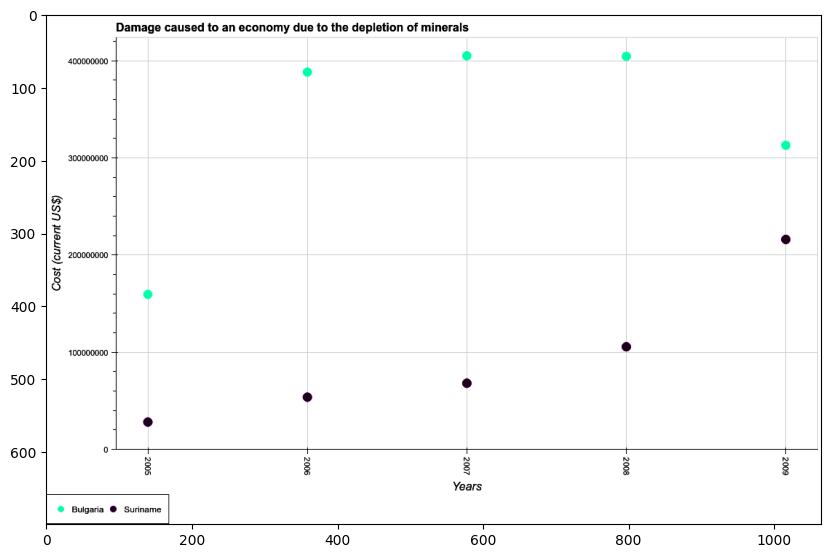

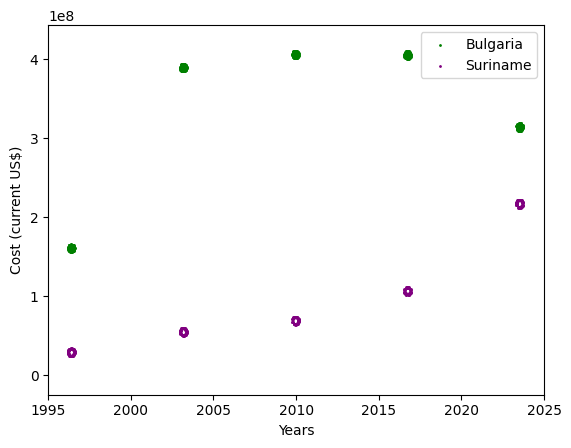

Directory '../results/17074' was created.
```json
{
  "x-axis": { 
    "title": "Year", 
    "range": [2005, 2015] 
  },
  "y-axis": { 
    "title": "Grants (current US$)", 
    "range": [0.0, 3.50e+7] 
  },
  "second-y-axis": { 
    "title": null, 
    "range": null 
  },
  "types": [
    ["Excluding technical cooperation", "green"],
    ["Technical cooperation", "red"]
  ]
}
```
{'x-axis': {'title': 'Year', 'range': [2005, 2015]}, 'y-axis': {'title': 'Grants (current US$)', 'range': [0.0, 35000000.0]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Excluding technical cooperation', 'green'], ['Technical cooperation', 'red']]}
{'topLeft': (96, 33), 'bottomRight': (716, 580)}


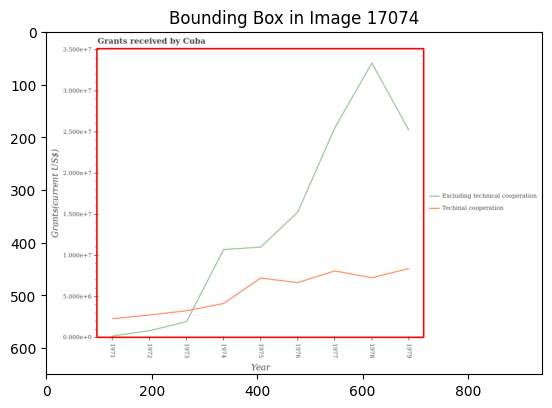

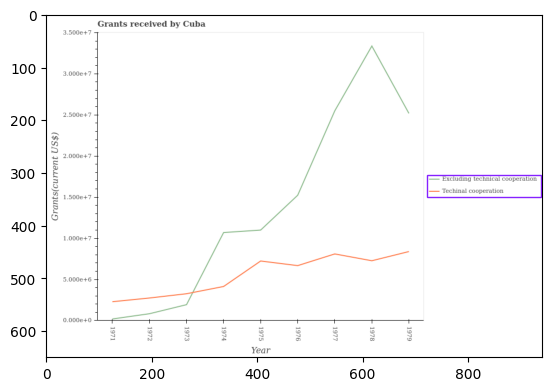

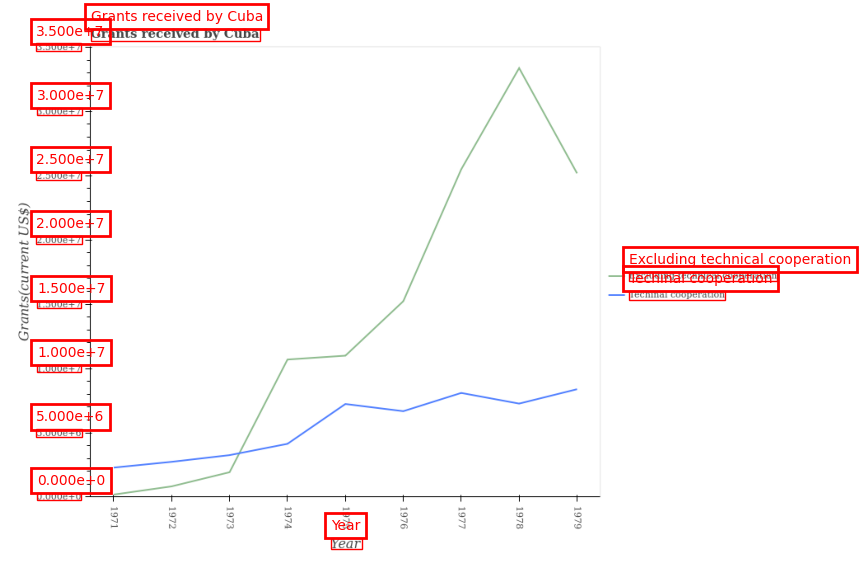

Y MIN 0.000e+0
Y MAX 3.500e+7
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 35000000.0
Y
OCR DIFF -545.3475114656612
SEM DIFF 35000000.0
OCR RATIO -1.5581357470447464e-05
PIXEL DIFF -0.35691558849066496
REAL DIFF FROM BASE POINT 22906.57852934909
Y_MIN -22906.57852934909
Y_MAX 35083148.91358505
x is in fault condition
X
Predicted [2005, 2015]
Chat GPT [2005, 2015]
Y
Predicted [-22906.57852934909, 35083148.91358505]
Chat GPT [0.0, 35000000.0]


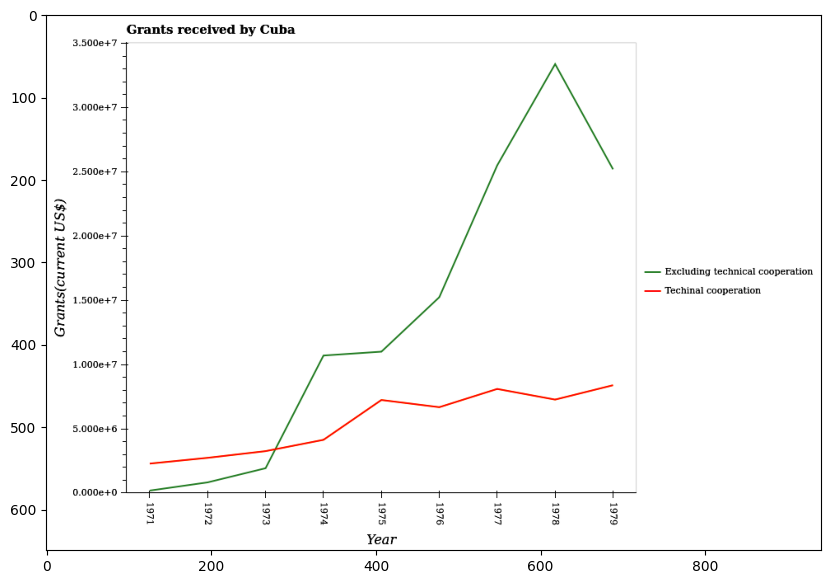

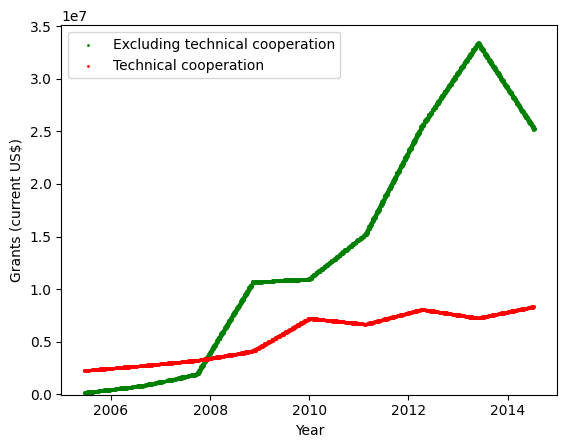

Directory '../results/20674' was created.
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
```json
{
  "x-axis": {
    "title": "Years",
    "range": [2007, 2009]
  },
  "y-axis": {
    "title": "Borrowers per 1,000 adults",
    "range": [0, 200]
  },
  "second-y-axis": {
    "title": null,
    "range": null
  },
  "types": [
    ["Azerbaijan", "red"],
    ["Madagascar", "yellow"],
    ["Samoa", "orange"],
    ["Sau

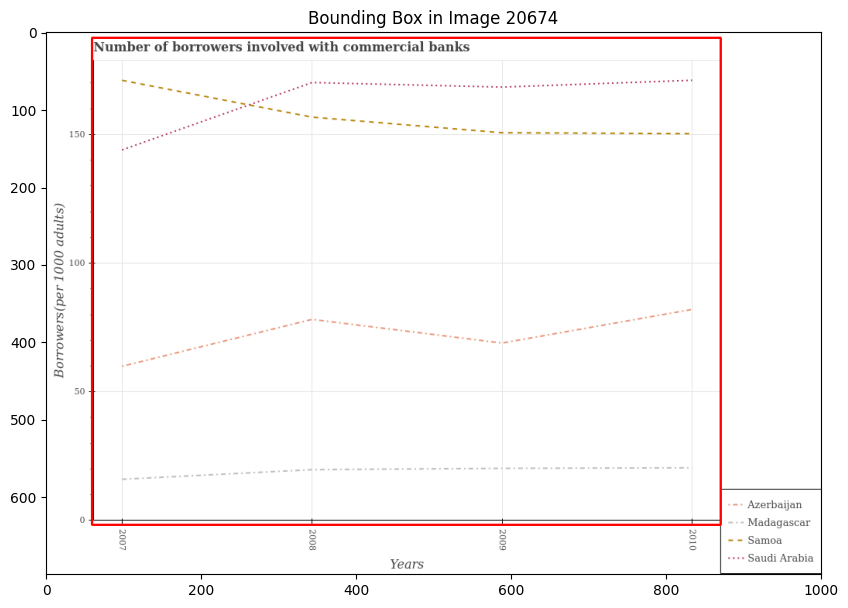

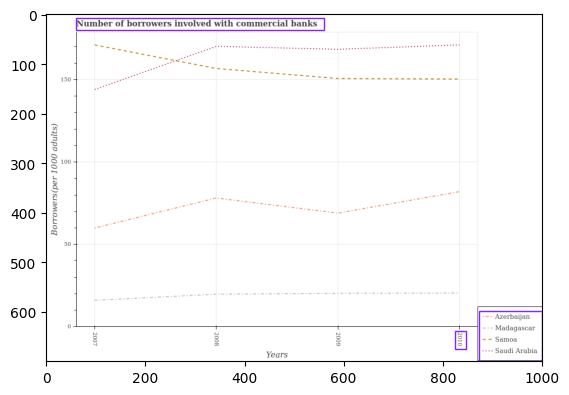

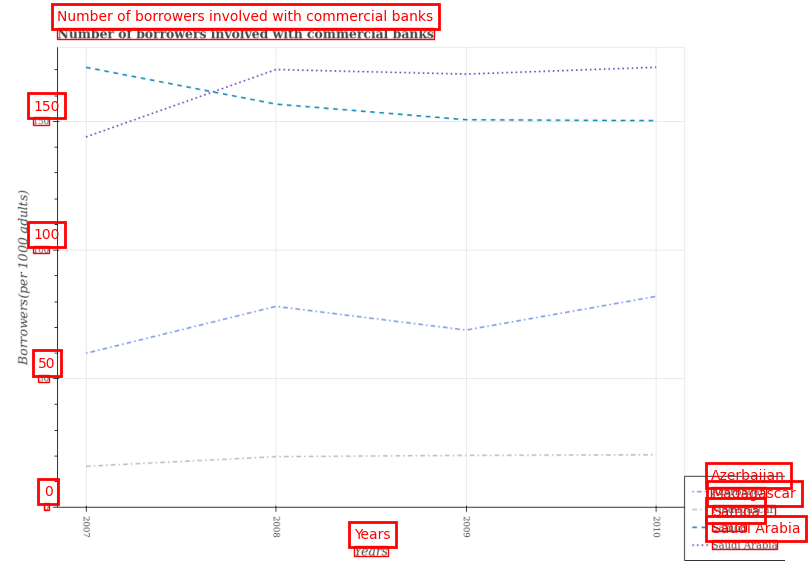

Y MIN 0
Y MAX 150
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 150.0
Y
OCR DIFF -497.9227344505489
SEM DIFF 150.0
OCR RATIO -3.3194848963369927
PIXEL DIFF -6.612705685198307
REAL DIFF FROM BASE POINT 1.9920878966779874
Y_MIN -1.9920878966779874
Y_MAX 187.49514269566274
x is in fault condition
X
Predicted [2007, 2009]
Chat GPT [2007, 2009]
Y
Predicted [-1.9920878966779874, 187.49514269566274]
Chat GPT [0, 200]


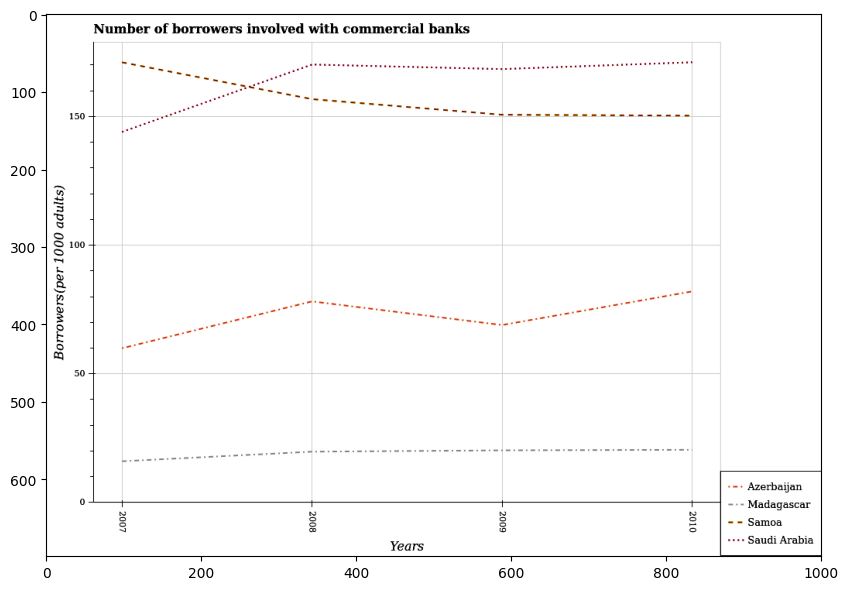

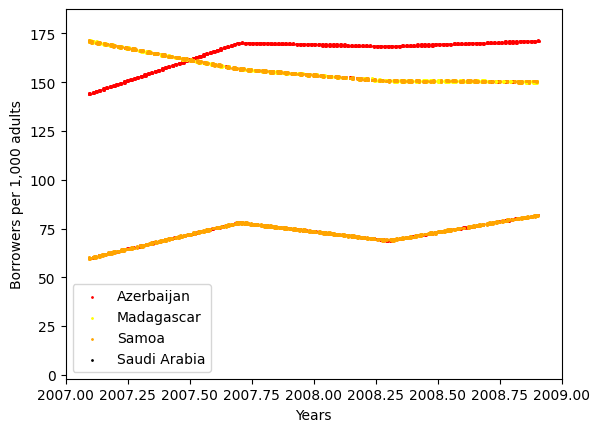

Directory '../results/4759' was created.
```json
{
  "x-axis": {
    "title": "Year",
    "range": [2001, 2021]
  },
  "y-axis": {
    "title": "Unemployed females as % of female labor force ages 15-24",
    "range": [0, 14]
  },
  "second-y-axis": {
    "title": null,
    "range": null
  },
  "types": [
    ["Total unemployment among youth (female) in Nigeria", "green"]
  ]
}
```
{'x-axis': {'title': 'Year', 'range': [2001, 2021]}, 'y-axis': {'title': 'Unemployed females as % of female labor force ages 15-24', 'range': [0, 14]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Total unemployment among youth (female) in Nigeria', 'green']]}
{'topLeft': (48, 16), 'bottomRight': (1001, 587)}


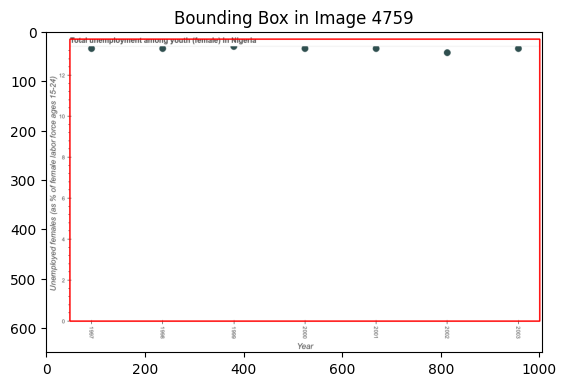

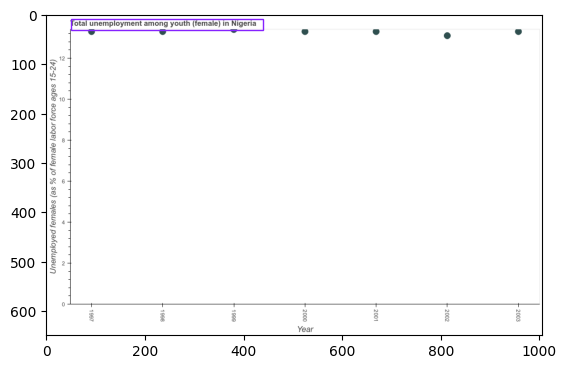

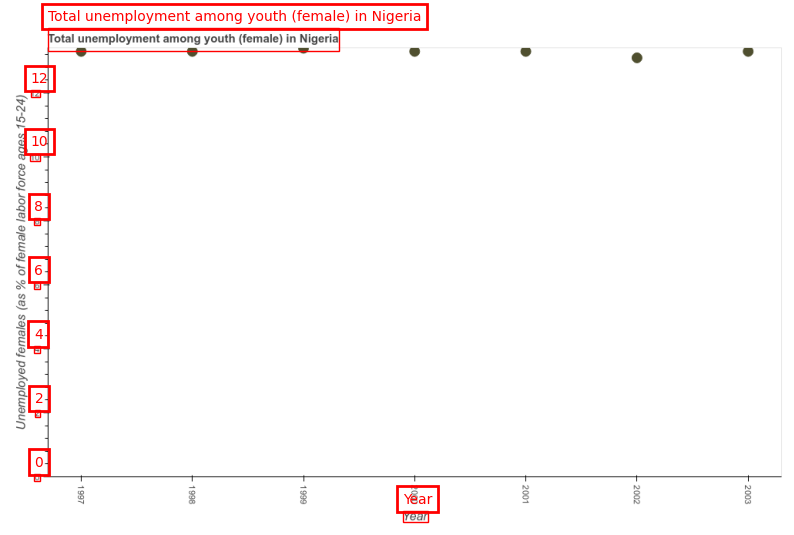

Y MIN 0
Y MAX 12
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 12.0
Y
OCR DIFF -498.0576815549284
SEM DIFF 12.0
OCR RATIO -41.50480679624403
PIXEL DIFF 0.7414832124486566
REAL DIFF FROM BASE POINT -0.017864996121744553
Y_MIN 0.017864996121744553
Y_MAX 13.775307665428965
SEMANTIC X MIN 0.0
SEMANTIC X MAX 0.0
X
OCR DIFF 0.0
SEM DIFF 0.0
x is in fault condition
X
Predicted [2001, 2021]
Chat GPT [2001, 2021]
Y
Predicted [0.017864996121744553, 13.775307665428965]
Chat GPT [0, 14]


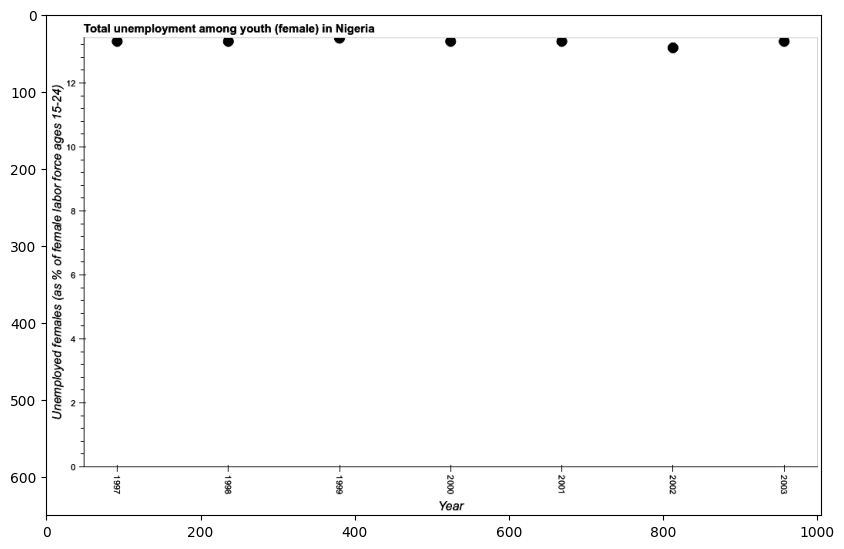

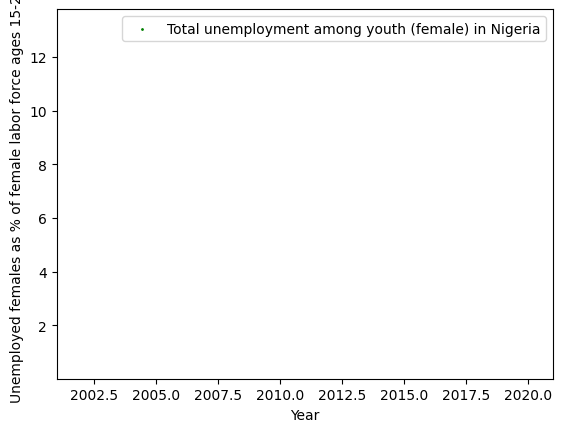

Directory '../results/18630' was created.
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
{
  "x-axis": {
    "title": "Years",
    "range": [2002, 2011]
  },
  "y-axis": {
    "title": "% of total expenditure in primary institutions",
    "range": [0, 100]
  },
  "second-y-axis": {
    "title": null,
    "range": null
  },
  "types": [
    ["Mexico", "purple"],
    ["Peru", "red"],
    ["Switzerland", "brown"]
  ]

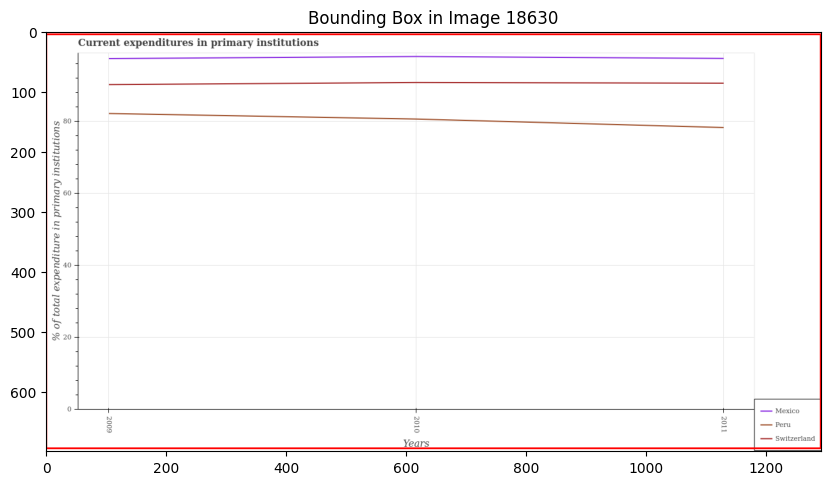

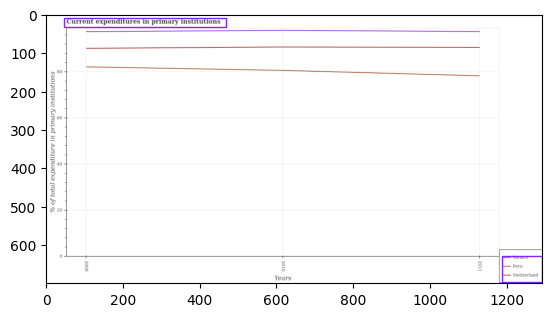

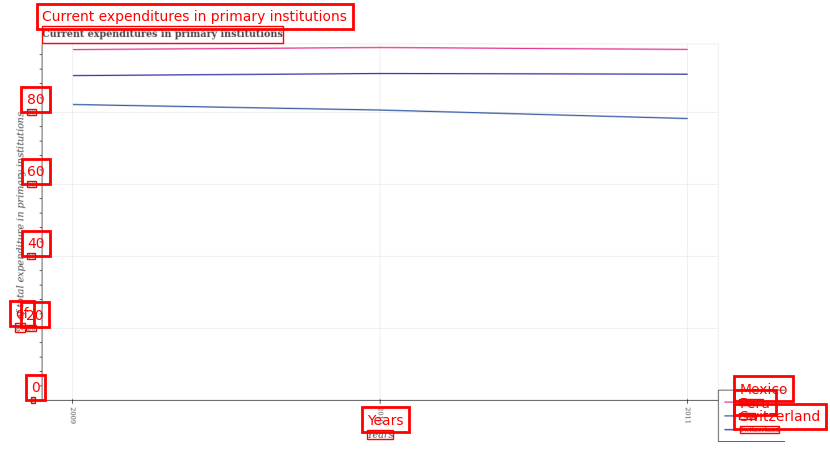

x is in fault condition
y is in fault condition
X
Predicted [2002, 2011]
Chat GPT [2002, 2011]
Y
Predicted [0, 100]
Chat GPT [0, 100]


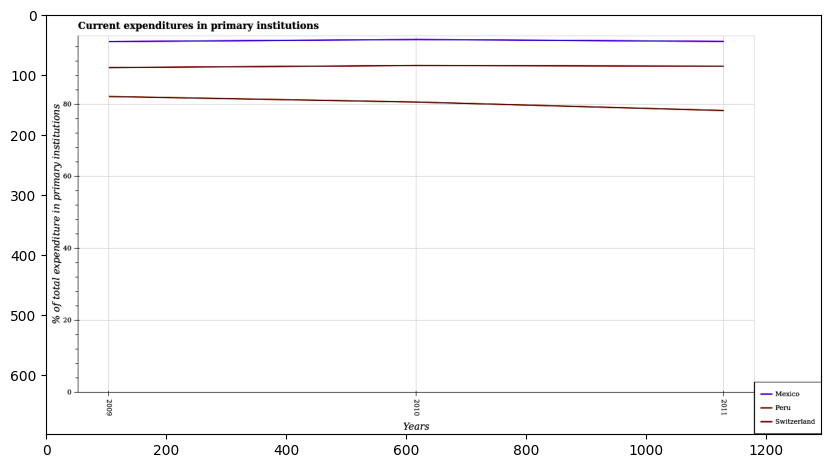

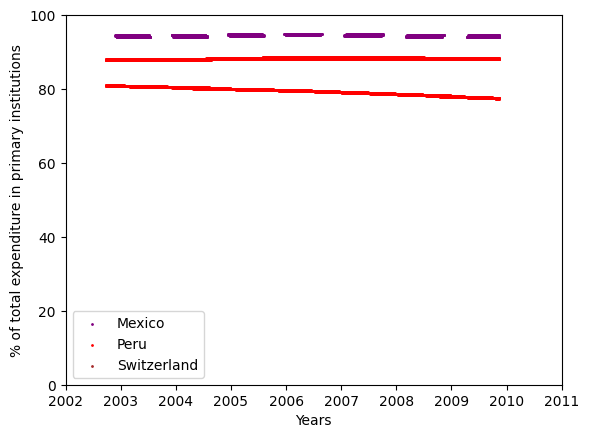

Directory '../results/4398' was created.
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
{ "x-axis": { "title": "Years", "range": [2002, 2009] }, "y-axis": { "title": "Net enrolment rate (%)", "range": [20, 100] }, "second-y-axis": { "title": null, "range": null }, "types": [["Armenia", "black"], ["Belize", "red"], ["Pakistan", "green"], ["Spain", "blue"]] }
{'x-axis': {'title': 'Years', 'range': [2002, 2009]}, 'y-

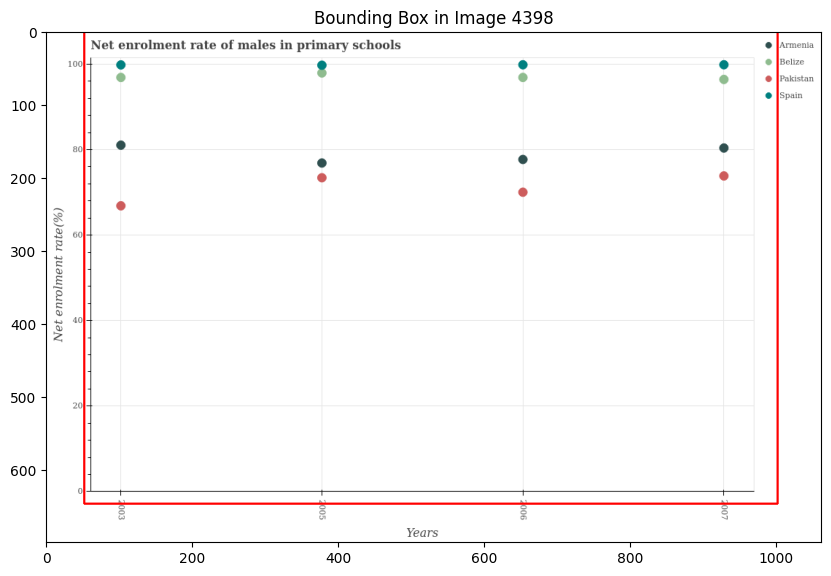

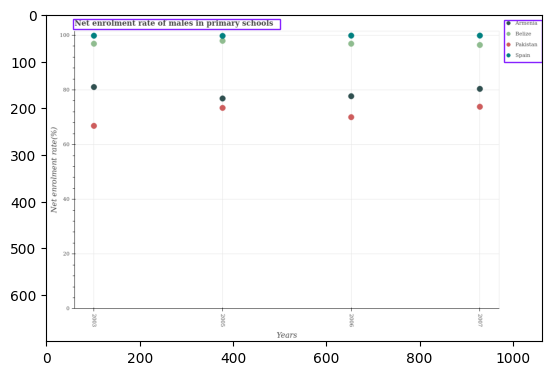

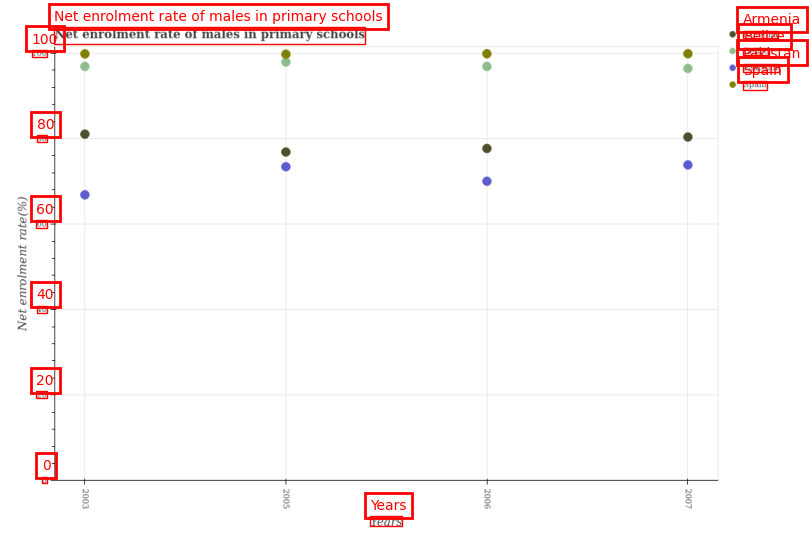

Y MIN 0
Y MAX 100
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 100.0
Y
OCR DIFF -585.0155885331333
SEM DIFF 100.0
OCR RATIO -5.850155885331333
PIXEL DIFF -17.498401578515768
REAL DIFF FROM BASE POINT 2.991100052973156
Y_MIN -2.991100052973156
Y_MAX 107.60424350398851
x is in fault condition
X
Predicted [2002, 2009]
Chat GPT [2002, 2009]
Y
Predicted [-2.991100052973156, 107.60424350398851]
Chat GPT [20, 100]


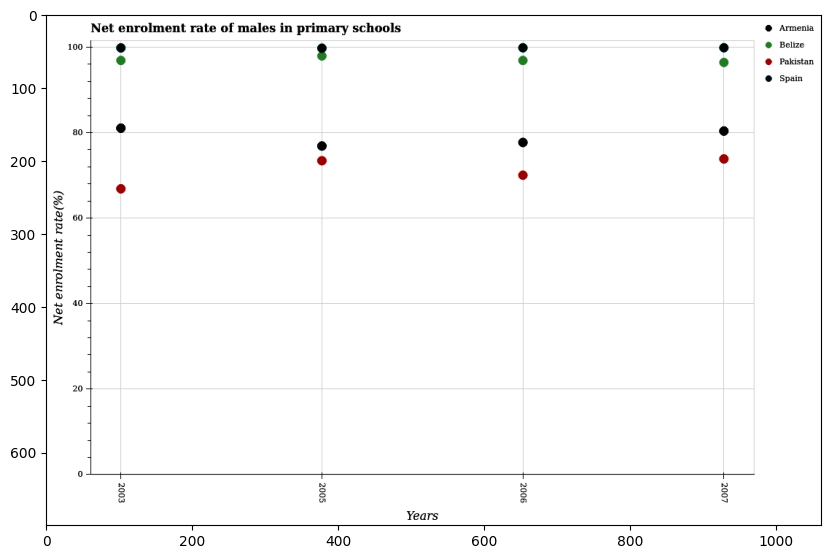

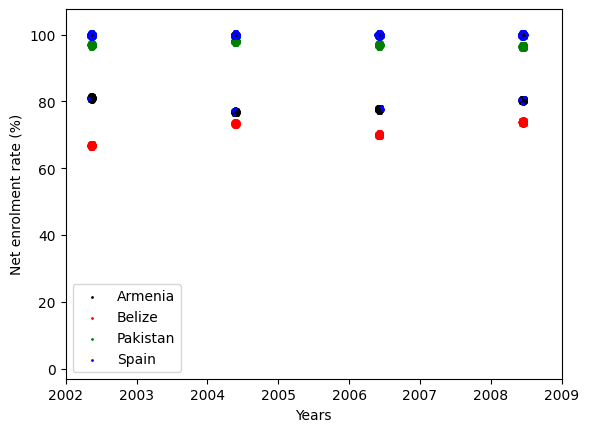

Directory '../results/4676' was created.
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
```json
{
  "x-axis": {
    "title": "Year",
    "range": [2001, 2021]
  },
  "y-axis": {
    "title": "Cost of computers, communications and other services (% of commercial service exports)",
    "range": [0, 25000]
  },
  "second-y-axis": {
    "title": null,
    "range": null
  },
  "types": [
    ["Cost of communications an

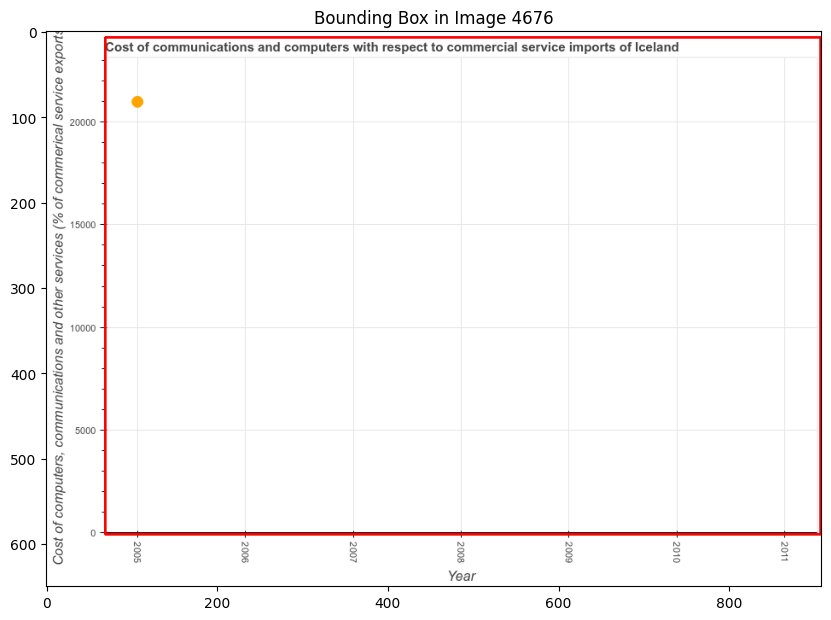

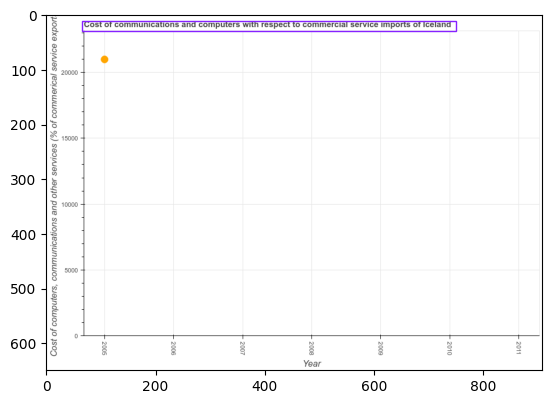

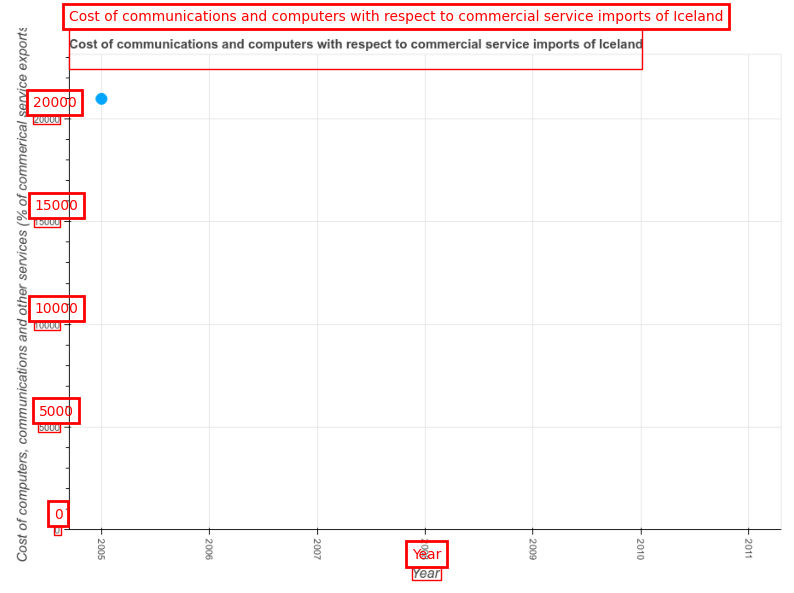

Y MIN 0
Y MAX 20000
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 20000.0
Y
OCR DIFF -481.4052158035338
SEM DIFF 20000.0
OCR RATIO -0.02407026079017669
PIXEL DIFF -1.0353833306580782
REAL DIFF FROM BASE POINT 43.01504415276748
Y_MIN -43.01504415276748
Y_MAX 24136.19950916524
x is in fault condition
X
Predicted [2001, 2021]
Chat GPT [2001, 2021]
Y
Predicted [-43.01504415276748, 24136.19950916524]
Chat GPT [0, 25000]


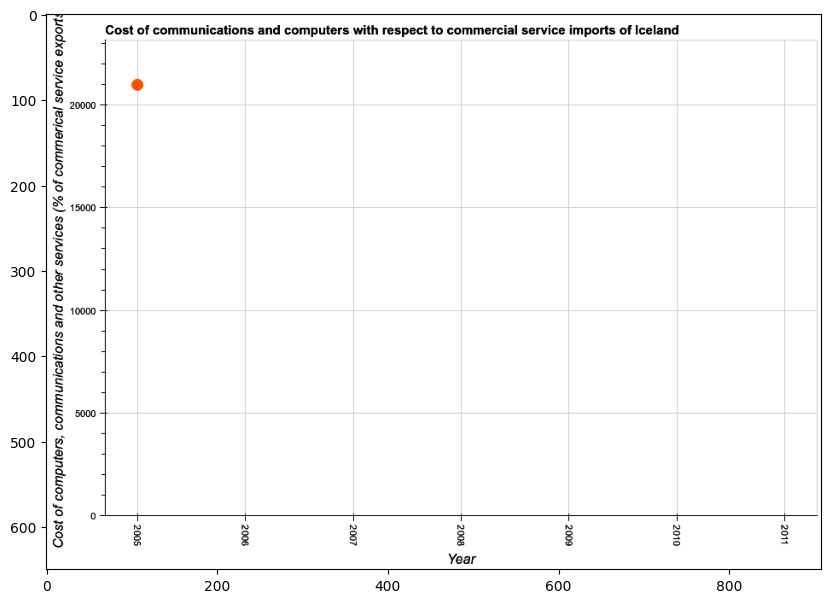

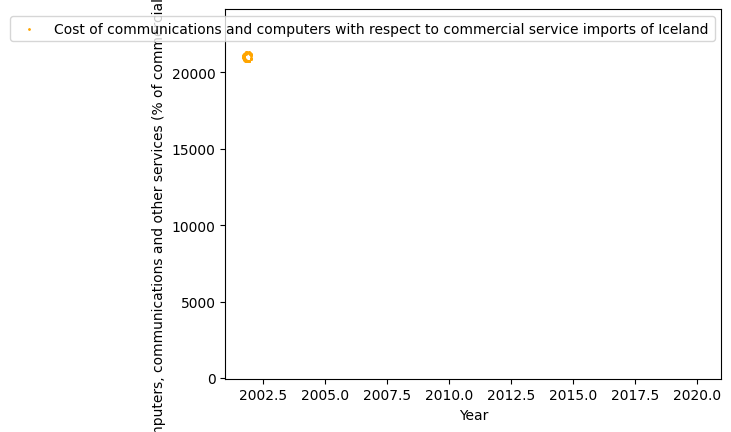

Directory '../results/19017' was created.
{
"x-axis": {
"title": "Years",
"range": [1960, 2020]
},
"y-axis": {
"title": "Ratio",
"range": [0, 100]
},
"second-y-axis": {
"title": null,
"range": null
},
"types": [
["Channel Islands", "purple"],
["Malawi", "green"],
["Thailand", "orange"]
]
}
{'x-axis': {'title': 'Years', 'range': [1960, 2020]}, 'y-axis': {'title': 'Ratio', 'range': [0, 100]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['Channel Islands', 'purple'], ['Malawi', 'green'], ['Thailand', 'orange']]}
{'topLeft': (52, 35), 'bottomRight': (1234, 630)}


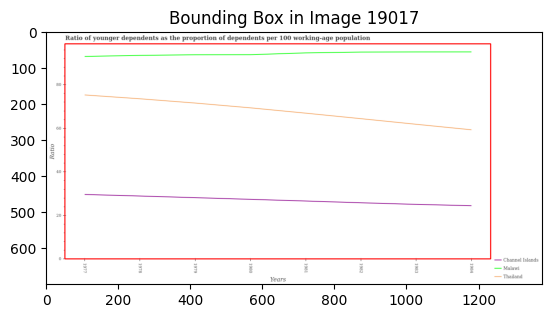

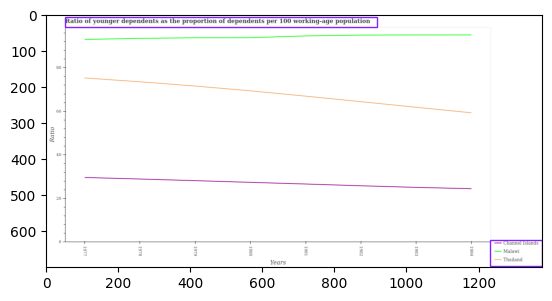

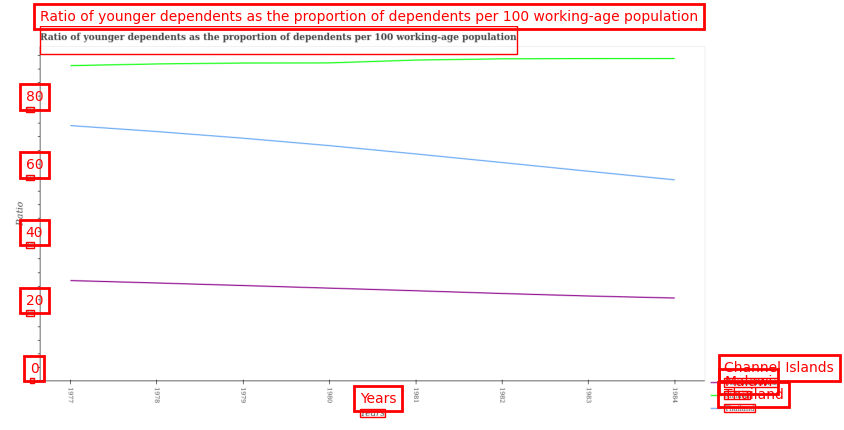

Y MIN 0
Y MAX 80
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 80.0
Y
OCR DIFF -482.0169649552554
SEM DIFF 80.0
OCR RATIO -6.025212061940692
PIXEL DIFF -0.377002889290452
REAL DIFF FROM BASE POINT 0.06257089135034048
Y_MIN -0.06257089135034048
Y_MAX 98.68914006641357
x is in fault condition
X
Predicted [1960, 2020]
Chat GPT [1960, 2020]
Y
Predicted [-0.06257089135034048, 98.68914006641357]
Chat GPT [0, 100]


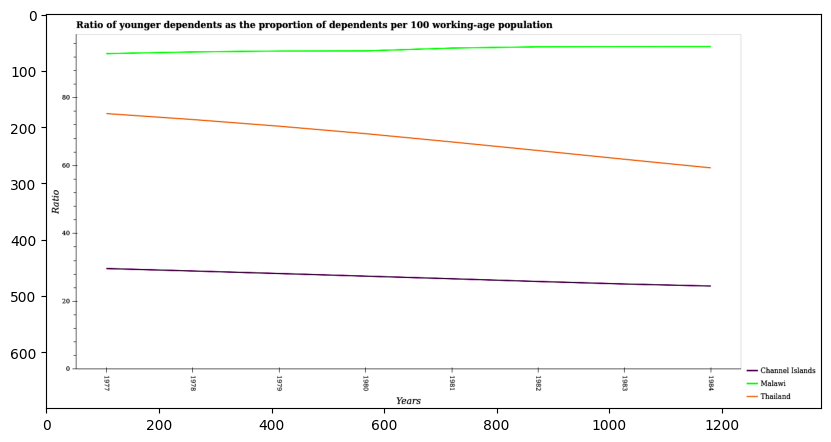

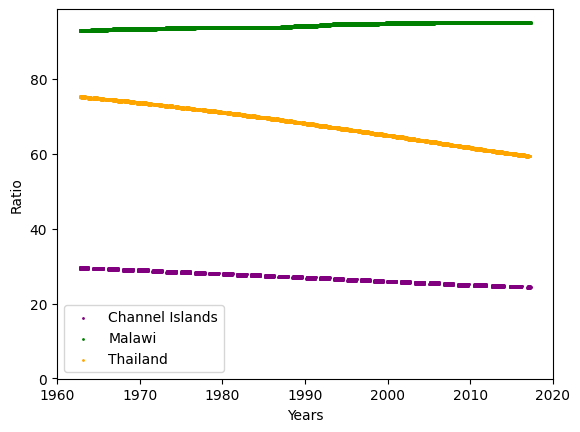

In [39]:
for image_num in [19764, 19933, 299, 17074, 20674, 4759, 18630, 4398, 4676, 19017]:
    run_pipeline(image_num, min_samples, predictor, model)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


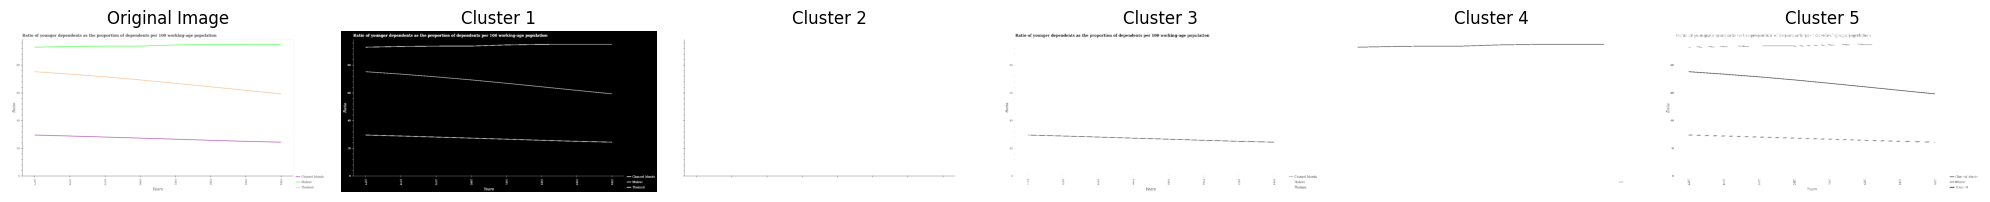

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from PIL import Image

# Load the image
image_path = '../plot_images/19017.png'  # Specify the path to your image
image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB
image = np.array(image)

# Reshape the image to be a list of pixels and normalize
pixels = image.reshape(-1, 3)
scaler = StandardScaler()
pixels_normalized = scaler.fit_transform(pixels)  # Normalize pixel values

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Random state for reproducibility
kmeans.fit(pixels_normalized)
labels = kmeans.labels_

# Assign cluster colors based on the mean color of the cluster
unique_labels = np.unique(labels)
mean_colors = np.array([pixels[labels == i].mean(axis=0) for i in unique_labels]).astype(int)

# Create an image for each cluster
fig, ax = plt.subplots(1, 6, figsize=(20, 3))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

for i in range(5):
    # Create an image where pixels in the cluster are black, others are white
    cluster_image = np.ones((pixels.shape[0], 3), dtype=np.uint8) * 255  # Start with a white image
    cluster_image[labels == i] = [0, 0, 0]  # Set pixels in the cluster to black
    cluster_image = cluster_image.reshape(image.shape)
    
    ax[i+1].imshow(cluster_image)
    ax[i+1].set_title(f'Cluster {i+1}')
    ax[i+1].axis('off')

plt.tight_layout()
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

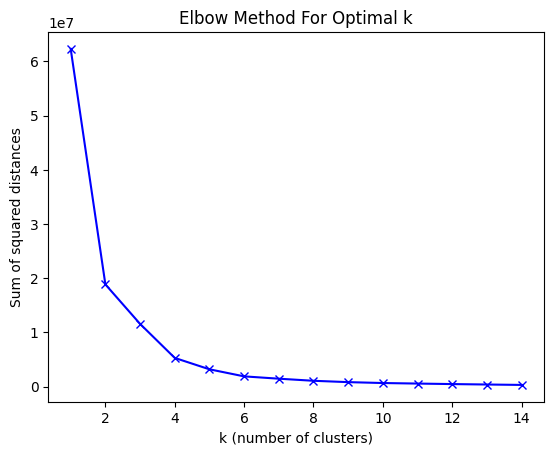

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


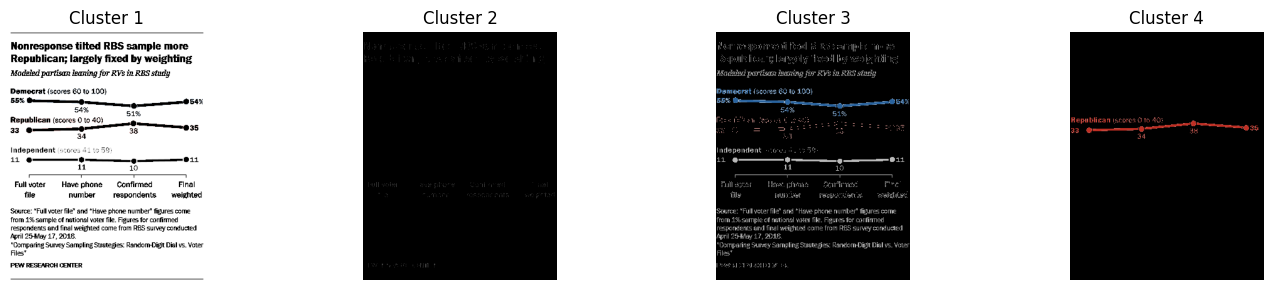

In [115]:
from skimage.io import imread
from skimage.color import rgb2lab
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Load and prepare the image
image = imread(r'../plot_images/4554.png')
if image.shape[2] == 4:  # Check for alpha channel and remove it if present
    image = image[:, :, :3]

# Convert image from RGB to LAB color space
image_lab = rgb2lab(image)

# Reshape the image data for clustering
pixels = image_lab.reshape(-1, 3)

# Use the Elbow Method to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)  # Test 1 to 14 clusters (adjust range as necessary)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pixels)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the Elbow graph, manually choose the appropriate number of clusters
num_clusters = int(input("Enter the optimal number of clusters based on the elbow plot: "))

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixels)
labels = kmeans.labels_

# Reshape labels to match the image layout
labels_image = labels.reshape(image.shape[0], image.shape[1])

# Initialize the figure for plotting clusters
fig, ax = plt.subplots(1, num_clusters, figsize=(15, 3))

for i in range(num_clusters):
    cluster_image = np.zeros_like(image)
    cluster_image[labels_image == i] = image[labels_image == i]
    ax[i].imshow(cluster_image)
    ax[i].set_title(f'Cluster {i+1}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()


In [116]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
K = range(2, 15)  # Silhouette score is not defined for k=1

for k in K:
    km = KMeans(n_clusters=k)
    cluster_labels = km.fit_predict(pixels)
    silhouette_avg.append(silhouette_score(pixels, cluster_labels))

plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Each k')
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KeyboardInterrupt: 